# single-particle.ipynb

This notebook performs the segmentation workflow adapted for the compressed F50 sand, but creates a single mesh instead of a mesh for each grain in the entire dataset.

## Import packages

In [1]:
# Standard library imports
from pathlib import Path
# Third-party imports
import matplotlib.pyplot as plt
from skimage import measure
# Local module imports
import segment
# Enable autoreload packages for changes made to local modules
%load_ext autoreload
%autoreload 2

## Load 3D data

Passing `slice_crop`, `row_crop`, and `col_crop` to only load part of the dataset

In [2]:
# Load images as 3D array from a directory containing images
ct_imgs_path = Path(
    r'c:\Users\gusb\Research\mhe-analysis\data\SandComp4_18_22\NoComptiff'
)
imgs = segment.load_images(
    ct_imgs_path,
    slice_crop=[75, 175], 
    row_crop=[450, 600], 
    col_crop=[100, 250],
    return_3d_array=True,
    convert_to_float=True,
    file_suffix='tiff'
)
print(f'Images loaded as 3D array: {imgs.shape}')

Images loaded as 3D array: (100, 150, 150)


## Binarize and segment data

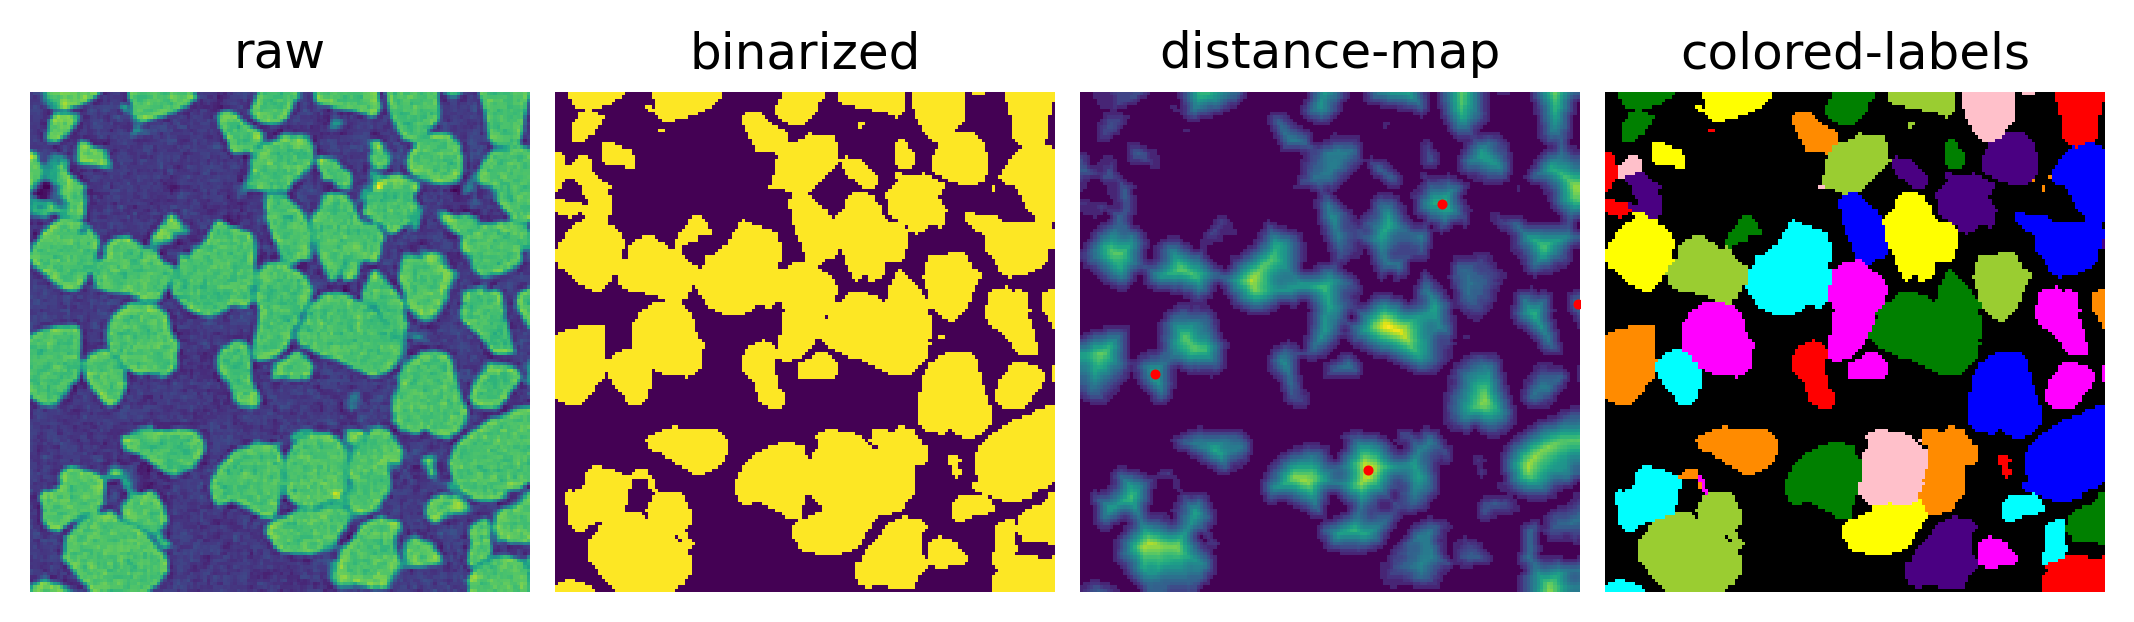

In [3]:
# Binarize data
imgs_binarized, thresh_vals = segment.binarize_multiotsu(imgs, n_otsu_classes=2)
# Segment particles
segment_dict = segment.watershed_segment(
    imgs_binarized, 
    min_peak_distance=7, 
    return_dict=True
)
# Plot segmentation steps
fig, axes = segment.plot_segment_steps(imgs, segment_dict, 55)
plt.show()

## Select sand grain

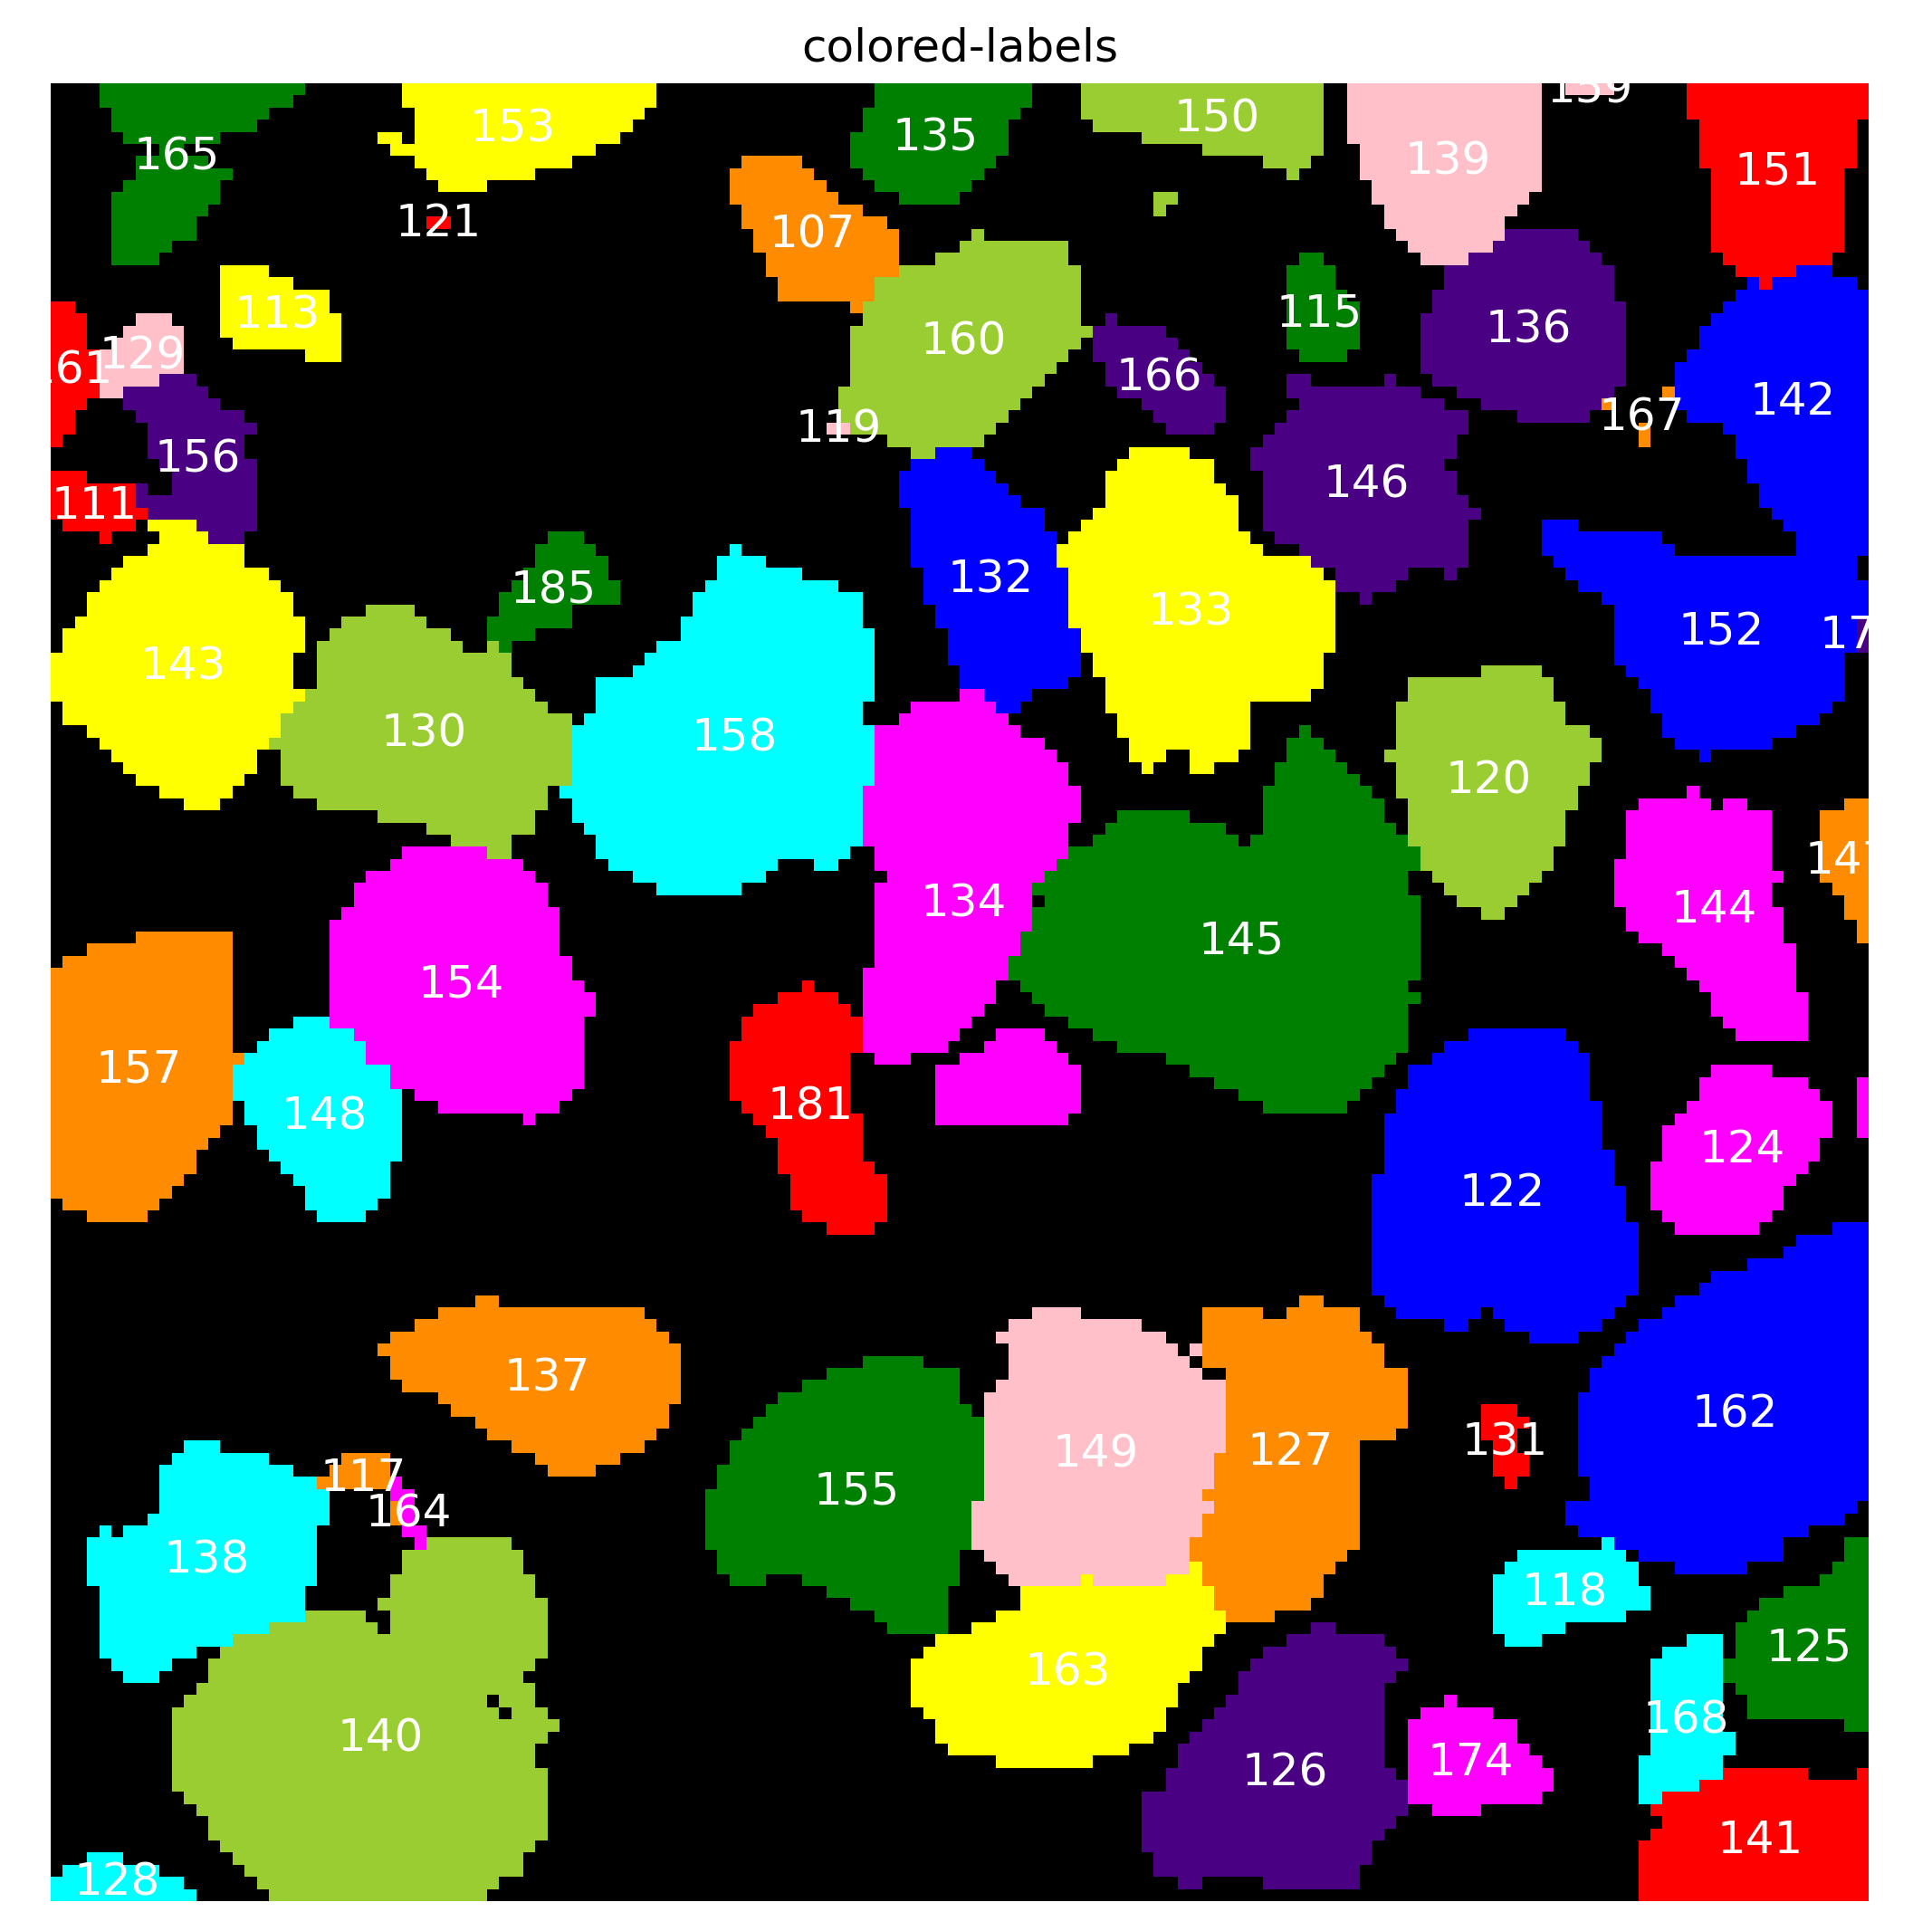

In [4]:
fig, ax = segment.show_particle_labels(segment_dict, 55)
plt.show()

Particle bounds: (47, 69), (62, 86), (22, 45)


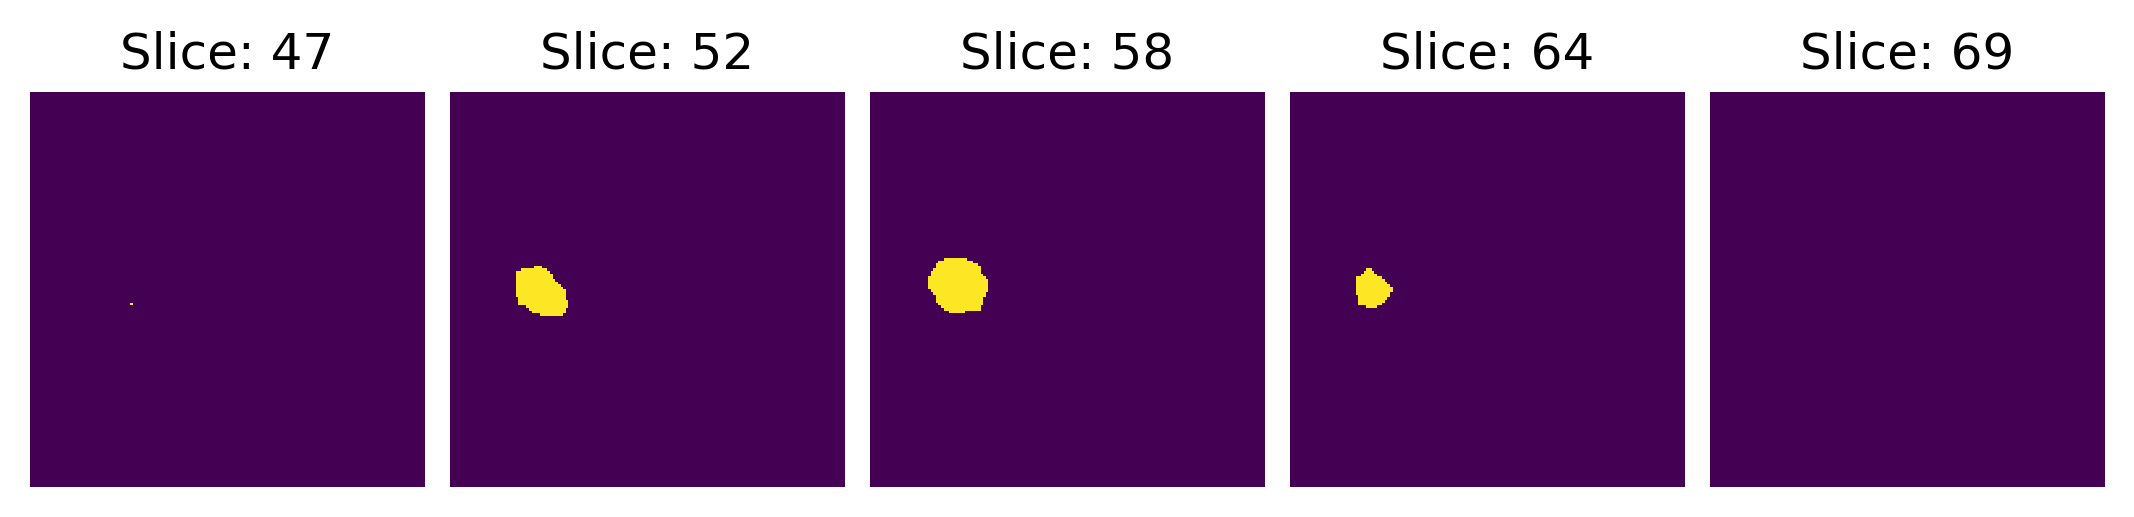

In [10]:
imgs_particle = segment.isolate_particle(segment_dict, 154)
fig, axes = segment.plot_particle_slices(imgs_particle, n_slices=5)
plt.show()

## Marching cubes algorithm

Visualize mesh with matplotlib 3D

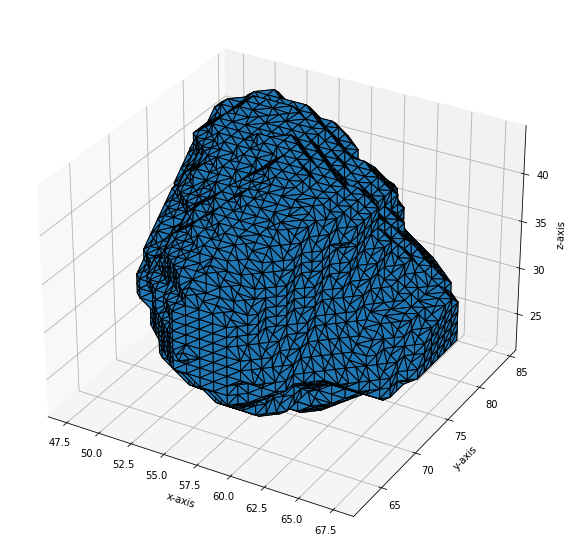

In [11]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(
    imgs_particle, step_size=1
)
fig, ax = segment.plot_mesh_3D(verts, faces)
plt.show()

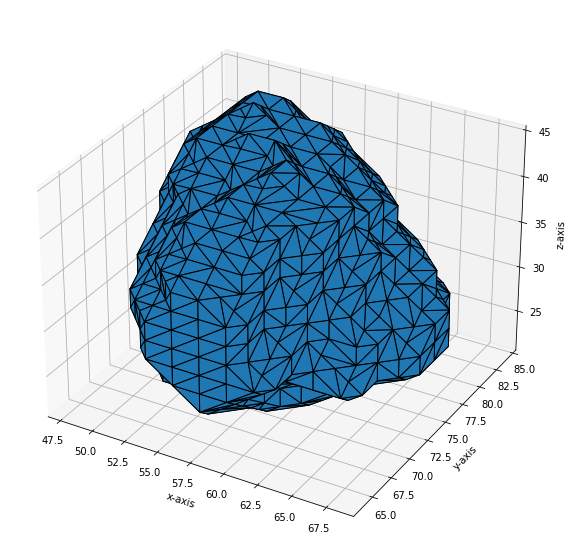

In [12]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(
    imgs_particle, step_size=2
)
fig, ax = segment.plot_mesh_3D(verts, faces)
plt.show()

## Save tri-mesh as STL with numpy-stl

In [ ]:
run_this_cell = False
if run_this_cell:
    save_dir = Path(r'c:\Users\gusb\Research\mhe-analysis\results')
    segment.save_stl(verts, faces, 'F63_154')

File already exists: c:\Users\gusb\Research\mhe-analysis\results\F63_154.stl
